In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
#Show all columns from dataset
pd.set_option('display.max_columns', None)

In [13]:
#Genres dataset
df1 = pd.read_csv("/content/genres_v2.csv", low_memory=False)

In [14]:
#Playlists dataset
df2 = pd.read_csv("/content/playlists.csv")

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

### Discovery
 df1.info shows that song_name, unnamed, and title have about 50%  of their data missing from this dataset. This indicates we will either need to fill these values or drop these columns.

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Playlist  39 non-null     object
 1   Genre     39 non-null     object
dtypes: object(2)
memory usage: 752.0+ bytes


In [17]:
df1.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [18]:
df1.describe(include='all')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305,42305,42305,42305,42305,42305.000000,42305.000000,42305,21519,20780.000000,20780
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,35877,35877,35877,35877,NaN,NaN,15,15439,NaN,132
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,audio_features,7D5qMGajdfznFcXFArk5VE,spotify:track:7D5qMGajdfznFcXFArk5VE,https://api.spotify.com/v1/tracks/7D5qMGajdfzn...,https://api.spotify.com/v1/audio-analysis/7D5q...,NaN,NaN,Underground Rap,Forever,NaN,Euphoric Hardstyle
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42305,9,9,9,9,NaN,NaN,5875,14,NaN,1398
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,NaN,NaN,NaN,NaN,NaN,250865.846685,3.972580,NaN,NaN,10483.970645,NaN
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,NaN,NaN,NaN,NaN,NaN,102957.713571,0.268342,NaN,NaN,6052.359519,NaN
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,NaN,NaN,NaN,NaN,NaN,25600.000000,1.000000,NaN,NaN,0.000000,NaN
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,NaN,NaN,NaN,NaN,NaN,179840.000000,4.000000,NaN,NaN,5255.750000,NaN
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,NaN,NaN,NaN,NaN,NaN,224760.000000,4.000000,NaN,NaN,10479.500000,NaN
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,NaN,NaN,NaN,NaN,NaN,301133.000000,4.000000,NaN,NaN,15709.250000,NaN


In [19]:
df2.describe()

,Playlist,Genre
count,39,39
unique,39,8
top,19WuHd4MxWLzE1fpMmw4S4,Emo
freq,1,9


In [73]:
df2.describe(include='all')

,Playlist,Genre
count,39,39
unique,39,8
top,19WuHd4MxWLzE1fpMmw4S4,Emo
freq,1,9


In [74]:
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.420,0.0598,0.0134,0.0556,0.389,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.103,0.0237,0.0000,0.1140,0.175,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.293,0.2170,0.0000,0.1660,0.591,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap
5,0.721,0.568,0,-11.295,1,0.414,0.0452,0.2120,0.1280,0.109,144.915,audio_features,6fsypiJHyWmeINsOLC1cos,spotify:track:6fsypiJHyWmeINsOLC1cos,https://api.spotify.com/v1/tracks/6fsypiJHyWme...,https://api.spotify.com/v1/audio-analysis/6fsy...,112511,4,Dark Trap
6,0.718,0.668,8,-4.162,1,0.137,0.0254,0.0078,0.1240,0.038,130.826,audio_features,0XfQbq7DaMOmVXgQ71eA6E,spotify:track:0XfQbq7DaMOmVXgQ71eA6E,https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...,https://api.spotify.com/v1/audio-analysis/0XfQ...,77584,4,Dark Trap


### Discovery
df1 reveals the song_name, title, and unnamed columns provide information that may not be beneficial to our research while also missing 50% of their data. Drop these columns.*italicized text*

In [22]:
df2.head(20)

,Playlist,Genre
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap
5,3CCC01CIQgca5cu14tgszj,Underground Rap
6,6MrMW8FhdwKI34IiP3fovl,Trap Metal
7,4cuGsxDEp3w42Q8GVMTEMD,Trap Metal
8,6IeTmw4eOwpRqQXhR38WHk,Trap Metal
9,0OzrpLh3mFdRgQluMQtcwU,Trap Metal


### Find Columns

Searched for playlist id from playlist.csv in genres_v2.csv to find relationship between tables. No relationship found.

In [23]:
df1['id'].str.find("6XyR8uzgkSoDzHuOxxRtLH ").max()


-1

## Check for null values

In [24]:
df1.isna().sum()

,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0


### Discovery
Noticing the large amount of null values within the columns 'song_name', 'title', and 'Unnamed' we will remove these columns.

### Dropping Columns

Dropped 'song_name' and 'title' columns from dataset as 50% of data did not contain song name or title.

In [25]:
#drop columns by index number
df1 = df1.drop(df1.columns[19:], axis=1)


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [27]:
#Verify null values = 0
df1.isna().sum()

,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0


### Determine largest genre in dataset.

In [28]:
#Determine largest genre in genres dataset dataset
df1['genre'].value_counts()

,count
genre,
Underground Rap,5875
Dark Trap,4578
Hiphop,3028
trance,2999
trap,2987
techhouse,2975
dnb,2966
psytrance,2961
techno,2956


In [29]:
#Largest genre in playlists dataset
df2['Genre'].value_counts()

,count
Genre,
Emo,9
Trap Metal,7
RnB,7
Dark Trap,5
Hiphop,5
Rap,3
Pop,2
Underground Rap,1


### Check Duplicates

In [30]:
#Check duplicates in genres dataset
df1.duplicated().sum()

3218

In [31]:
#drop duplicates in dataset
df1 = df1.drop_duplicates()

In [32]:
df1.duplicated().sum()

0

In [33]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 39087 entries, 0 to 42304
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      39087 non-null  float64
 1   energy            39087 non-null  float64
 2   key               39087 non-null  int64  
 3   loudness          39087 non-null  float64
 4   mode              39087 non-null  int64  
 5   speechiness       39087 non-null  float64
 6   acousticness      39087 non-null  float64
 7   instrumentalness  39087 non-null  float64
 8   liveness          39087 non-null  float64
 9   valence           39087 non-null  float64
 10  tempo             39087 non-null  float64
 11  type              39087 non-null  object 
 12  id                39087 non-null  object 
 13  uri               39087 non-null  object 
 14  track_href        39087 non-null  object 
 15  analysis_url      39087 non-null  object 
 16  duration_ms       39087 non-null  int64  
 17

In [34]:
#duplicates for playlist dataset
df2.duplicated().sum()

0

Check for Missing Values

In [35]:
# Missing data in genres dataset
df1.isna().sum()

,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0


In [36]:
#Missing data in playlist dataset
df2.isna().sum()

,0
Playlist,0
Genre,0


### IQR/Find Outliers

In [37]:
# Cleaning outliers for genres dataset
def filter_outliers(df1, columns):
    for col in columns:
        q1 = df1[col]. quantile(0.25)
        q3 = df1[col]. quantile(0.75)
        iqr = q3 - q1
        print(f"IQR for {col}: {iqr}")
        lower_bound = q1 - 1.5 *iqr
        upper_bound = q3 + 1.5 *iqr
        df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound) ]
    return df1

In [38]:
# Applying the function to remove outliers from columns
df1 = filter_outliers(df1, ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence', 'tempo'])

IQR for danceability: 0.24
IQR for energy: 0.29500000000000004
IQR for key: 7.0
IQR for loudness: 3.612
IQR for mode: 1.0
IQR for speechiness: 0.1517
IQR for acousticness: 0.10625
IQR for instrumentalness: 0.7609999999999999
IQR for liveness: 0.20285000000000003
IQR for valence: 0.359
IQR for tempo: 31.691000000000003


In [39]:
#Gathering information on genres dataset after romoving outliers
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30338 entries, 0 to 42304
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      30338 non-null  float64
 1   energy            30338 non-null  float64
 2   key               30338 non-null  int64  
 3   loudness          30338 non-null  float64
 4   mode              30338 non-null  int64  
 5   speechiness       30338 non-null  float64
 6   acousticness      30338 non-null  float64
 7   instrumentalness  30338 non-null  float64
 8   liveness          30338 non-null  float64
 9   valence           30338 non-null  float64
 10  tempo             30338 non-null  float64
 11  type              30338 non-null  object 
 12  id                30338 non-null  object 
 13  uri               30338 non-null  object 
 14  track_href        30338 non-null  object 
 15  analysis_url      30338 non-null  object 
 16  duration_ms       30338 non-null  int64  
 17

### Value count after Data cleaning and processing
*   Dropping null values
*   Removing duplicates
*   Removing outliers





In [40]:
df1['genre'].value_counts()

,count
genre,
Underground Rap,4091
Dark Trap,3111
trance,2471
techno,2346
dnb,2333
psytrance,2252
techhouse,2153
hardstyle,2087
Hiphop,2013


In [41]:
df1.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000
mean,0.641823,0.781669,5.356714,-6.252736,0.551882,0.120572,0.043194,0.303082,0.187058,0.354487,147.032618,256464.499868,3.975377
std,0.155071,0.163089,3.668417,2.568003,0.497309,0.101353,0.063629,0.377189,0.126086,0.232681,22.656781,104589.214272,0.242948
min,0.169000,0.190000,0.000000,-13.655000,0.000000,0.023200,0.000001,0.000000,0.010700,0.018700,82.363000,48667.000000,1.000000
25%,0.526000,0.662000,1.000000,-7.909000,0.000000,0.048400,0.001352,0.000000,0.097600,0.159000,129.932250,183000.000000,4.000000
50%,0.647000,0.817000,6.000000,-6.112500,1.000000,0.071700,0.011000,0.013300,0.131000,0.318000,143.970000,229100.000000,4.000000
75%,0.769000,0.924000,8.000000,-4.490250,1.000000,0.166000,0.058500,0.758750,0.267000,0.518000,160.083000,314625.750000,4.000000
max,0.988000,1.000000,11.000000,0.770000,1.000000,0.428000,0.267000,0.989000,0.606000,0.988000,209.072000,913052.000000,5.000000


### Correlation Matrix

In [42]:
#Select numeric values from dataset
numeric_df = df1.select_dtypes(include=[float, int])


In [43]:
#Find correlation of numeric values
correlation_matrix = numeric_df.corr(method='kendall')

In [44]:
correlation_matrix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.281228,-0.008822,-0.183155,0.073177,0.190223,0.170033,-0.097766,-0.155366,0.235732,-0.165683,-0.065641,0.033353
energy,-0.281228,1.000000,0.031238,0.344235,-0.034155,-0.073982,-0.308564,0.257141,0.112110,-0.032709,0.018454,0.200238,-0.000313
key,-0.008822,0.031238,1.000000,-0.008063,-0.211842,-0.009709,-0.015920,0.052410,-0.011315,0.017347,-0.009856,0.051506,-0.000909
loudness,-0.183155,0.344235,-0.008063,1.000000,-0.006918,0.058655,-0.043794,-0.133766,0.104335,0.068306,0.187454,-0.074263,0.024624
mode,0.073177,-0.034155,-0.211842,-0.006918,1.000000,0.038694,-0.013599,-0.038794,0.001192,0.024600,-0.013156,-0.049008,-0.003089
speechiness,0.190223,-0.073982,-0.009709,0.058655,0.038694,1.000000,0.206012,-0.294491,0.036751,0.183870,0.138525,-0.195991,0.041285
acousticness,0.170033,-0.308564,-0.015920,-0.043794,-0.013599,0.206012,1.000000,-0.353559,-0.021432,0.136215,0.061964,-0.261296,0.009082
instrumentalness,-0.097766,0.257141,0.052410,-0.133766,-0.038794,-0.294491,-0.353559,1.000000,-0.052138,-0.251235,-0.178877,0.385545,-0.021696
liveness,-0.155366,0.112110,-0.011315,0.104335,0.001192,0.036751,-0.021432,-0.052138,1.000000,-0.023656,0.059966,-0.067130,-0.005033
valence,0.235732,-0.032709,0.017347,0.068306,0.024600,0.183870,0.136215,-0.251235,-0.023656,1.000000,0.056193,-0.134013,0.040890


In [45]:
#Find lowest correlations per genre.
correlation_matrix.min()

,0
danceability,-0.281228
energy,-0.308564
key,-0.211842
loudness,-0.183155
mode,-0.211842
speechiness,-0.294491
acousticness,-0.353559
instrumentalness,-0.353559
liveness,-0.155366
valence,-0.251235


### Correlations from correlation matrix
#### Positive Correlations
speechiness and danceability = .18
valence and danceability = .36
energy and loudness = .60
instrumentalness and energy = .30
liveness and energy = .23
duration and energy = .29
liveness and loudness = .16
tempo and loudness = .15
danceability and speechines = .18
accoustiness and speehiness = .16
valence and speechiness = .21
tempo and specchiness = .16
duration and instrumentalness = .60



loudness and energy
valence and danceability
Problem Statement: The rise of music streaming platforms like Spotify, Apple Music, and Amazon Music has transformed how people listen to music. With millions of tracks available, users’ preferences and listening behaviors are crucial in shaping the music experience. However, what influences a user’s choice of music? How can platforms use this data to improve user engagement and retention?
Objective: In this analysis, we will explore user engagement, identify trending genres, and uncover factors that could help improve music recommendations and subscription rates. Our goal is to provide actionable insights for music streaming platforms to better understand their users.

Problem Statement: Music streaming platforms host millions of tracks, but how do musical features such as danceability, energy, and loudness shape user preferences? Can we identify patterns in user behavior based on these features to enhance user experience and improve recommendations?
Objective: This analysis aims to explore the impact of key musical features on user engagement (e.g., number of listens, session duration) and identify correlations between track attributes and user preferences.

### Covariance matrix

In [46]:
numeric_df.cov()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,0.024047,-0.009950,-0.009293,-0.097258,0.006804,0.003894,0.001901,-0.004593,-0.004163,0.013028,-0.589685,-8.352880e+02,0.001797
energy,-0.009950,0.026598,0.032605,0.214651,-0.003561,-0.003102,-0.003775,0.019018,0.003886,-0.000963,-0.076185,4.808119e+03,0.000426
key,-0.009293,0.032605,13.457284,-0.103235,-0.472706,-0.011344,-0.002339,0.101304,-0.004913,0.024291,-1.330815,2.839623e+04,0.001894
loudness,-0.097258,0.214651,-0.103235,6.594638,-0.007239,0.020008,-0.015881,-0.234543,0.050559,0.055602,12.016632,-4.534508e+04,0.017924
mode,0.006804,-0.003561,-0.472706,-0.007239,0.247316,0.002740,-0.000344,-0.004668,-0.000016,0.003352,-0.105449,-1.986643e+03,-0.000783
speechiness,0.003894,-0.003102,-0.011344,0.020008,0.002740,0.010272,0.001632,-0.015294,0.000642,0.005986,0.487487,-3.385040e+03,0.000703
acousticness,0.001901,-0.003775,-0.002339,-0.015881,-0.000344,0.001632,0.004049,-0.007936,-0.000435,0.002515,0.118779,-1.853330e+03,-0.000082
instrumentalness,-0.004593,0.019018,0.101304,-0.234543,-0.004668,-0.015294,-0.007936,0.142272,-0.003313,-0.023737,-1.984227,2.422167e+04,-0.001611
liveness,-0.004163,0.003886,-0.004913,0.050559,-0.000016,0.000642,-0.000435,-0.003313,0.015898,-0.000790,0.118514,-9.198347e+02,-0.000107
valence,0.013028,-0.000963,0.024291,0.055602,0.003352,0.005986,0.002515,-0.023737,-0.000790,0.054140,0.460856,-4.860286e+03,0.002244


In [47]:
df1.to_csv('cleaned_Genres.csv')

## Report


### Describe the correlation between instrumentalness and duration, and discuss how these two variables influence one another.

Instrumentalness: A measure of how much of the track is instrumental, with higher values indicating that the track is primarily or entirely without vocals.

Duration: Length of track in milliseconds

The correlation between instrumentalness and duration is 0.6 which is considered a strong positive correlation.

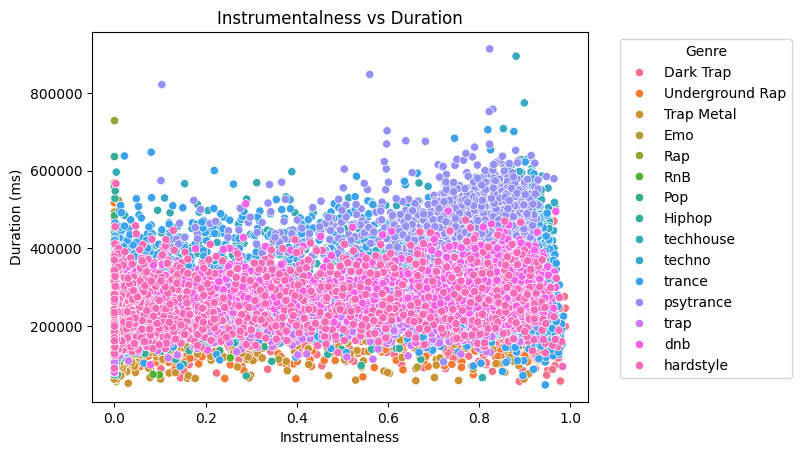

In [60]:
plt.figure(1)
sns.scatterplot(data=df1, x=df1['instrumentalness'], y=df1['duration_ms'], hue='genre', legend='full')
plt.title('Instrumentalness vs Duration')
plt.xlabel('Instrumentalness')
plt.ylabel('Duration (ms)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This signifies that as the instrumentalness is increased the duration is likely to increase. However, it is not definite that as the instrumentalness increases the duration will increase. The strong correlation refers to musical compositions that include extended instrumental sections that normally extend the duration of the song. From this dataset the genres with strongest correlations between instrumentalness and duraton are Dark Trap, Trance, and Techno.

## Determine the correlation between acousticness and energy. Describe what acousticness and energy represent and discuss how they influence one another.

Acousticness: A measure of how acoustic (non-electronic) the track sounds. High acousticness indicates the use of natural, non-electric instruments, while low acousticness suggests electronic production.

Energy: A measure of the intensity and activity in a track. High energy tracks feel fast, loud, and frantic, while low energy tracks are softer, slower, and more calm.

The inverse moderate strong correlation between acousticness and energy indicate that as compositions increase the non-electronic instruments such as guitars, pianos, the energy and  intensity decreases.

Acoustic songs include softer more natural sounding instruments where as high energy tracks feel fast, loud, and frantic. They use amplified sounds, bass-heavy beats, and dynamic synthesized effects.
Genres from our dataset with the highest inverse correlation between acousticness and Energy  include Dark Trap and Emo.


# What makes music danceable?
## Analayzing the positive and negative correlations with danceability we found that the louder and more energetic the song the less danceable it is and the more valence in a song, the more danceable it is.
## (In music valence is a measure of how positive a song is)

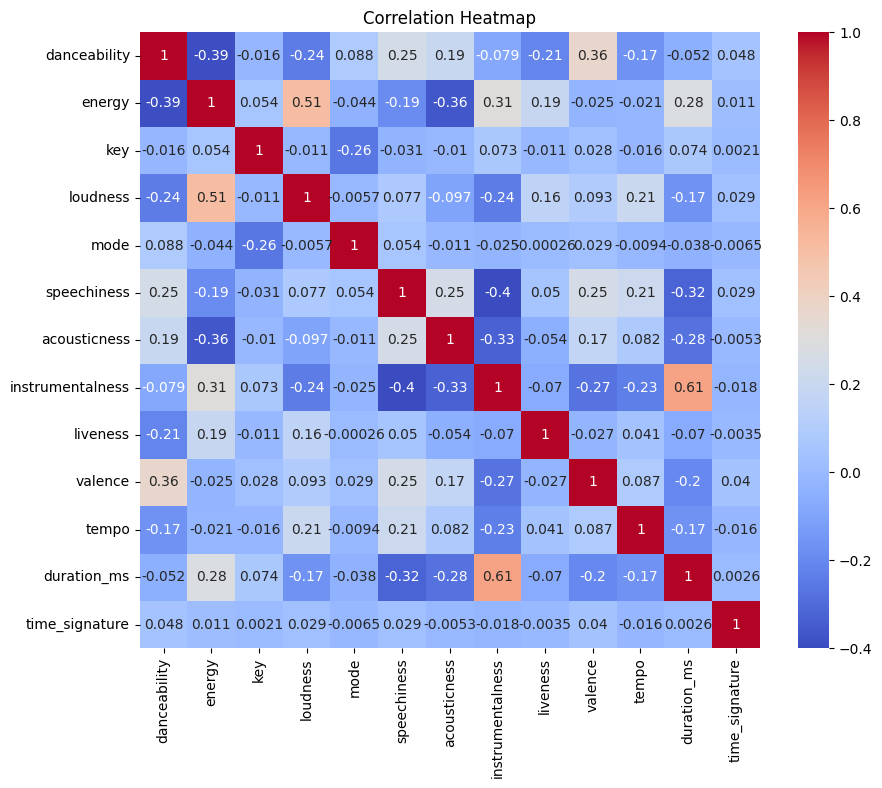

In [49]:
columns_to_correlate = ['danceability', 'valence', 'loudness', 'energy', 'tempo', 'liveness']
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

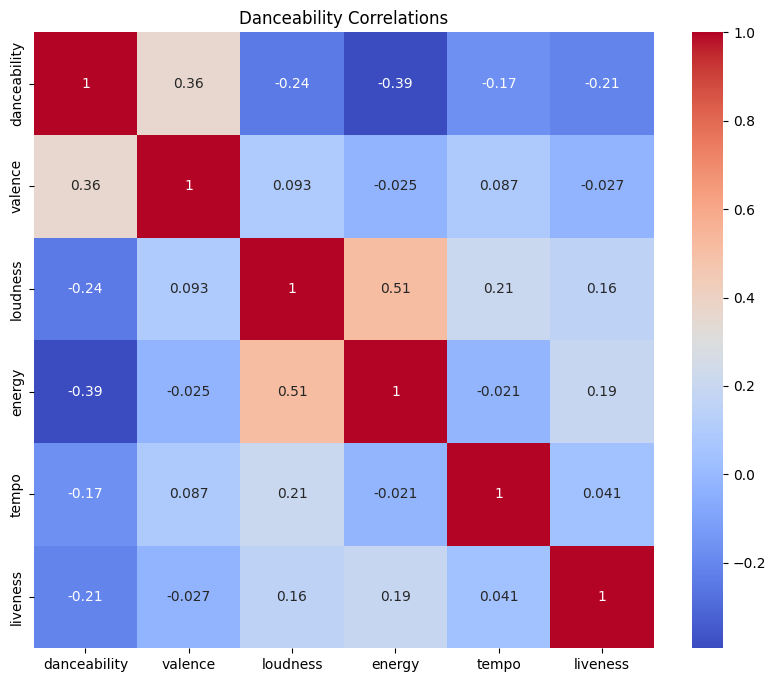

In [50]:
corr_matrix = numeric_df[columns_to_correlate].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Danceability Correlations")
plt.show()

# Amount of valence in top 5 dancebale songs

In [51]:
numeric_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

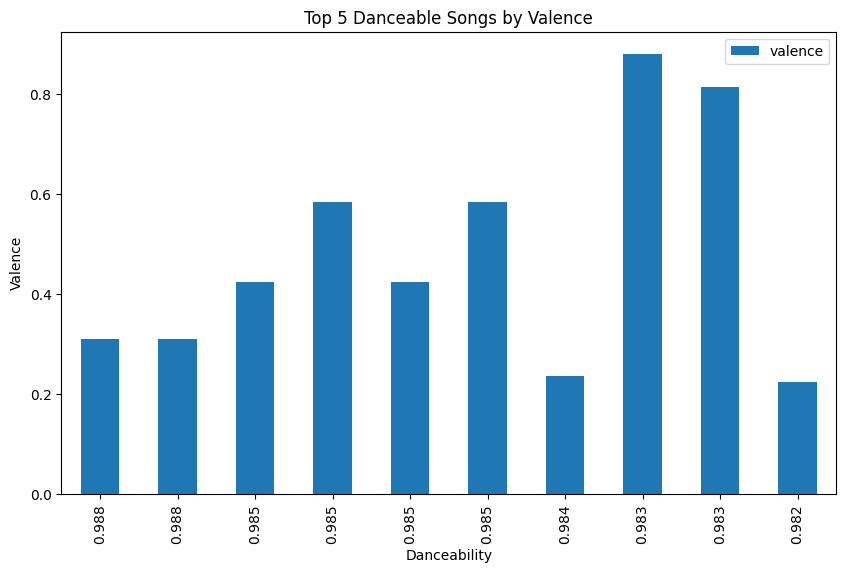

In [72]:
top_5 = numeric_df.nlargest(10, 'danceability')
top_5.plot(x='danceability', y='valence', kind='bar', legend=True, figsize=(10, 6))
plt.title('Top 5 Danceable Songs by Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.show()